# Notebook 4: Multivariate Analysis and Conclusions

In this notebook, all categorical and numerical variables will be analized against the target variable (Alzheimer's diagnosis = categorical variable)


#### Table of contents:
* 

## Imports

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
# Gets src path 
src_path = os.path.dirname(os.getcwd())

# Adds src_path if it doesn't exist in sys.path (to access utils)
if os.path.exists(src_path) and src_path not in sys.path:
    sys.path.append(src_path)
    
import utils.data_tools as dt
import utils.viz_tools as vt

In [3]:
# Load datasets

df_main = pd.read_csv('../data/processed/main_data.csv')
df_bm = pd.read_csv('../data/processed/biomarker_data.csv')
df_adni = pd.read_csv('../data/processed/adni_clean_data.csv')
df_adni_full = pd.read_csv('../data/processed/adni_full_data.csv')

In [48]:
palette_grad = ['#80b2e8', '#9694DB', '#432786', '#772183', '#C46CBE']
palette = ['#80b2e8', '#432786', '#C46CBE', '#772183', '#9694DB']
palette_2 = ['#b4d5ff', '#432786', '#9694DB', '#772183', '#C46CBE']
# palette_3 = ['#C46CBE', '#432786', '#80b2e8']
palette_3 = ['#C46CBE','#80b2e8', '#432786']

## Saved variables

The variables that seem to be related to an AD diagnosis are:
* Behavioral_Problems (main)
* Memory_Complaints (main)
* APOE4 (adni)
* Functional_Assessment (main)
* ADL (main)
* MMSE (main, bm, adni)
* MOCA (bm, adni)
* Plasma_ptau181 (bm, adni)
* Age (main, bm, adni)

Categorical:
* Behavioral_Problems (main)
* Memory_Complaints (main)
* APOE4 (adni)

Numerical:
* Functional_Assessment (main)
* ADL (main)
* MMSE (main, bm, adni)
* MOCA (bm, adni)
* Plasma_ptau181 (bm, adni)
* Age (main, bm, adni)

### Main

In [5]:
cols_main = ['Age', 'MMSE', 'Functional_Assessment', 'ADL', 'DX']
num_main = df_main[cols_main]

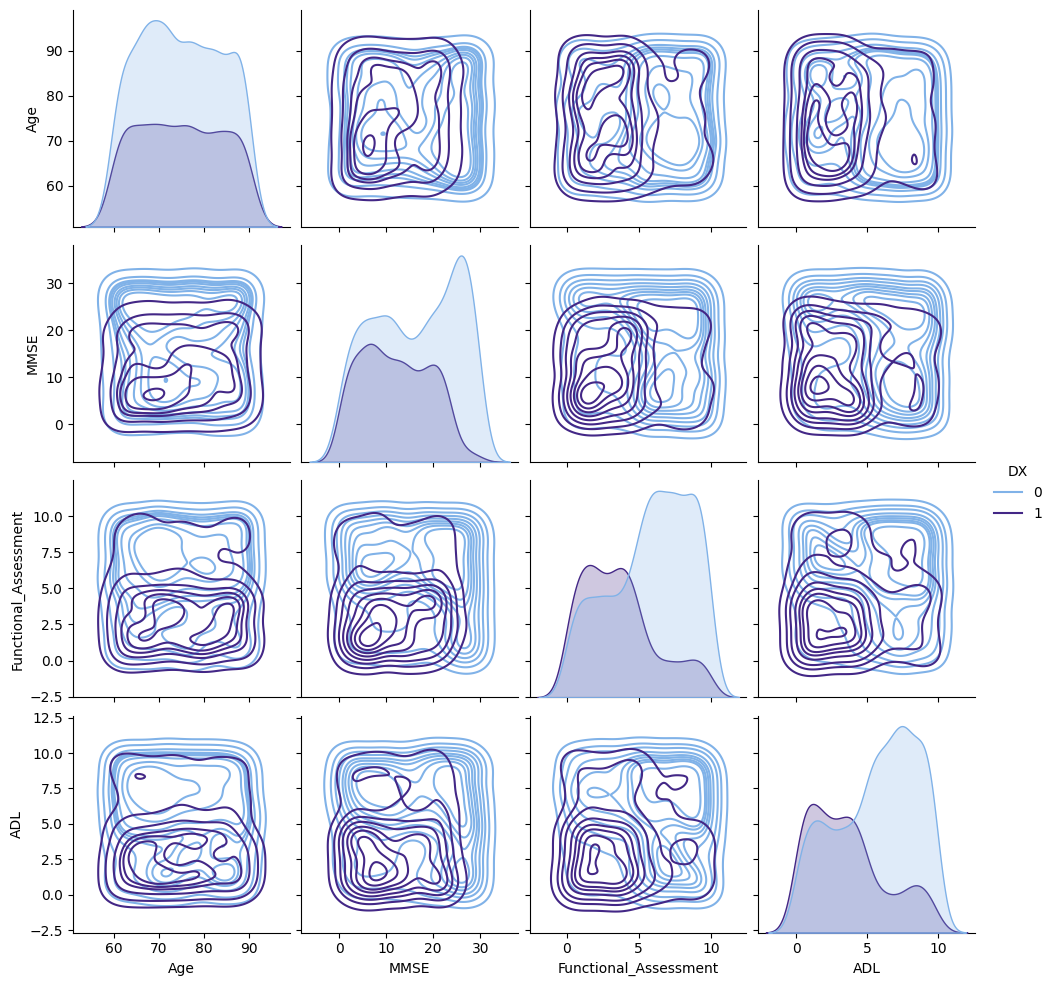

In [6]:
sns.pairplot(num_main, hue = 'DX', kind = 'kde', palette = ['#80b2e8', '#432786']);

### Biomarkers and ADNI

In [7]:
adni_full = df_adni_full[['Age', 'MMSE', 'MOCA', 'APOE4', 'Plasma_ptau181', 'Group', 'DX']].copy()
adni_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             767 non-null    float64
 1   MMSE            767 non-null    int64  
 2   MOCA            757 non-null    float64
 3   APOE4           767 non-null    int64  
 4   Plasma_ptau181  767 non-null    float64
 5   Group           767 non-null    object 
 6   DX              767 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 42.1+ KB


In [8]:
# Imputation of null values based on the median of the group it belongs to
median = adni_full.groupby('Group')['MOCA'].transform('median')
adni_full.loc[adni_full['MOCA'].isna(), 'MOCA'] = median

In [34]:
sort_group = {'CU-': 0, 'CU+': 1, 'MCI-': 2, 'MCI+': 3, 'AD': 4}
adni_full = adni_full.sort_values(by = 'Group', key = lambda x: x.map(sort_group), ascending = False)
adni_full

,Age,MMSE,MOCA,APOE4,Plasma_ptau181,Group,DX
468,86.5,26,14.0,0,23.097,AD,AD
276,89.6,23,17.0,1,29.407,AD,AD
596,75.1,24,16.0,1,25.479,AD,AD
598,60.7,22,18.0,1,23.224,AD,AD
498,66.8,21,17.0,2,25.937,AD,AD
...,...,...,...,...,...,...,...
747,75.8,30,30.0,0,12.224,CU-,CU
748,68.1,30,22.0,1,7.497,CU-,CU
749,77.9,29,22.0,0,30.474,CU-,CU
750,78.8,28,24.0,0,15.825,CU-,CU


In [25]:
cols = ['Age', 'MMSE', 'MOCA', 'Plasma_ptau181', 'DX']
moca_ptau = pd.concat([df_bm[cols], adni_full[cols]])

In [26]:
moca_ptau.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 0 to 468
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             880 non-null    float64
 1   MMSE            880 non-null    int64  
 2   MOCA            880 non-null    float64
 3   Plasma_ptau181  880 non-null    float64
 4   DX              880 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 41.2+ KB


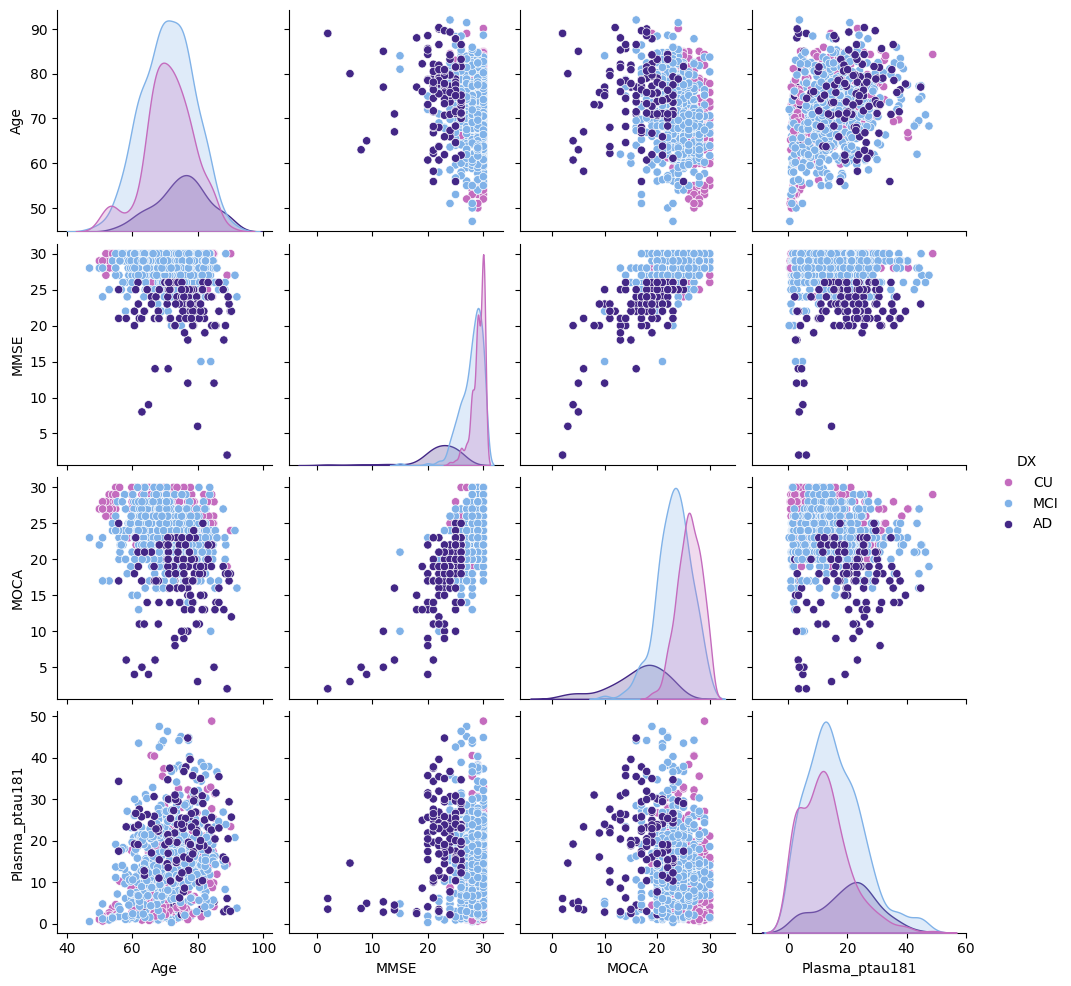

In [49]:
sns.pairplot(moca_ptau, hue = 'DX', palette = palette_3);

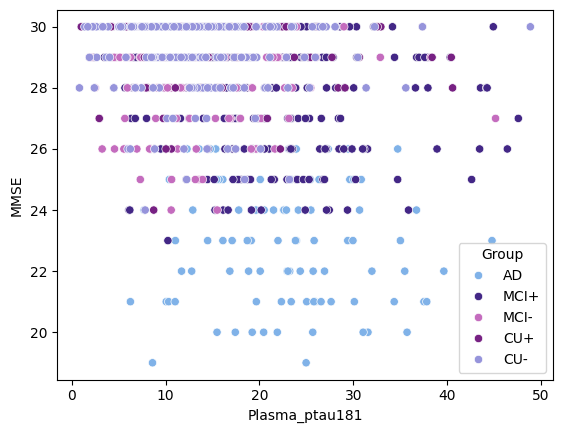

In [35]:
sns.scatterplot(adni_full, x = 'Plasma_ptau181', y = 'MMSE', hue = 'Group', palette = palette);

In [14]:
moca_ptau.groupby(['DX', 'MMSE']).max()

Age  MOCA  Plasma_ptau181
DX  MMSE                            
AD  2     89.0   2.0        6.120000
    6     80.0   3.0       14.650480
    8     63.0   5.0        3.720000
    9     65.0   4.0        4.958714
    12    85.0  10.0        5.310000
    14    71.0  16.0        4.530000
    18    88.0  15.0        2.926218
    19    82.2  19.0       24.971000
    20    88.5  22.0       35.723000
    21    82.1  23.0       37.821000
    22    90.3  23.0       39.641000
    23    89.6  22.0       44.771000
    24    89.3  22.0       36.725000
    25    87.8  25.0       30.838000
    26    86.5  25.0       34.728000
CU  24    84.5  25.0        8.740000
    25    83.0  28.0       23.198000
    26    85.9  30.0       22.229000
    27    89.0  30.0       20.842000
    28    85.3  29.0       40.571000
    29    84.8  30.0       40.431000
    30    90.1  30.0       48.854000
MCI 15    84.0  21.0        4.810000
    20    75.0  23.0        1.843753
    22    77.0  21.0        6.140430
    23    68.0  24.0       10.255000
    24    92.0  26.0       35.878000
    25    88.3  27.0       42.601000
    26    88.4  27.0       46.404000
    27    91.4  28.0       47.573000
    28    85.9  30.0       44.248000
    29    84.7  30.0       40.316000
    30    88.6  30.0       44.907000

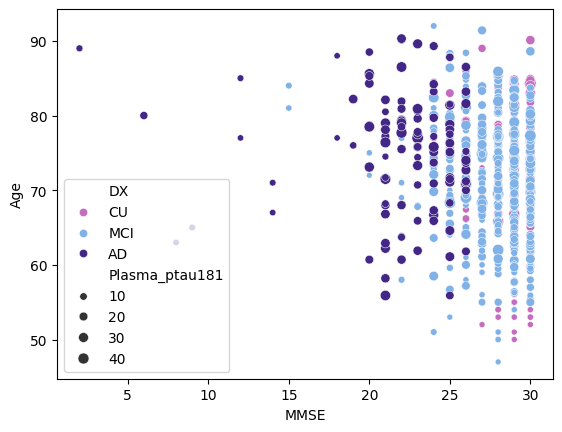

In [50]:
sns.scatterplot(moca_ptau, x = 'MMSE', y = 'Age', hue = 'DX', size = 'Plasma_ptau181', palette = palette_3, legend = True);

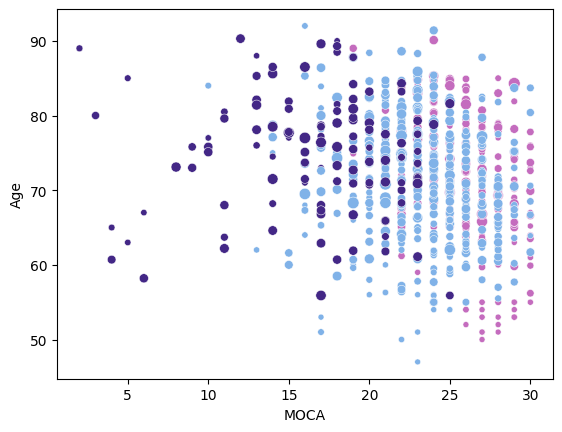

In [51]:
sns.scatterplot(moca_ptau, x = 'MOCA', y = 'Age', hue = 'DX', size = 'Plasma_ptau181', palette = palette_3, legend = False);

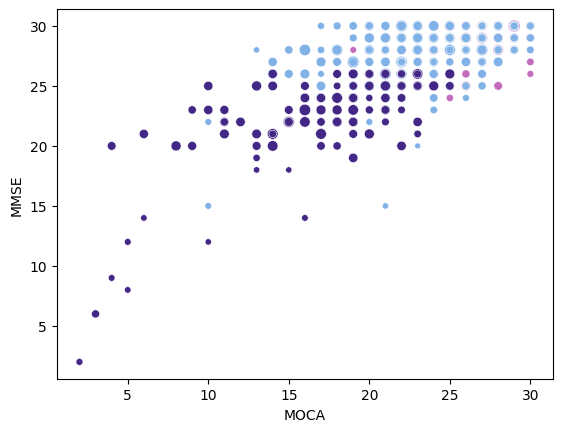

In [52]:
sns.scatterplot(moca_ptau, x = 'MOCA', y = 'MMSE', hue = 'DX', size = 'Plasma_ptau181', palette = palette_3, legend = False);

In [18]:
adni_temp = df_adni.copy()
bm_temp = df_bm.copy()

adni_temp['DX'] = adni_temp['DX'].apply(lambda x: 1 if x == 'AD' else 0)
bm_temp['DX'] = bm_temp['DX'].apply(lambda x: 1 if x == 'AD' else 0)

In [19]:
mmse_score = pd.concat([df_main[['Age', 'MMSE', 'DX']], bm_temp[['Age', 'MMSE', 'DX']], adni_temp[['Age', 'MMSE', 'DX']]], axis = 0)

In [20]:
mmse_score.DX.value_counts()

DX
0    2048
1     853
Name: count, dtype: int64

### ADNI

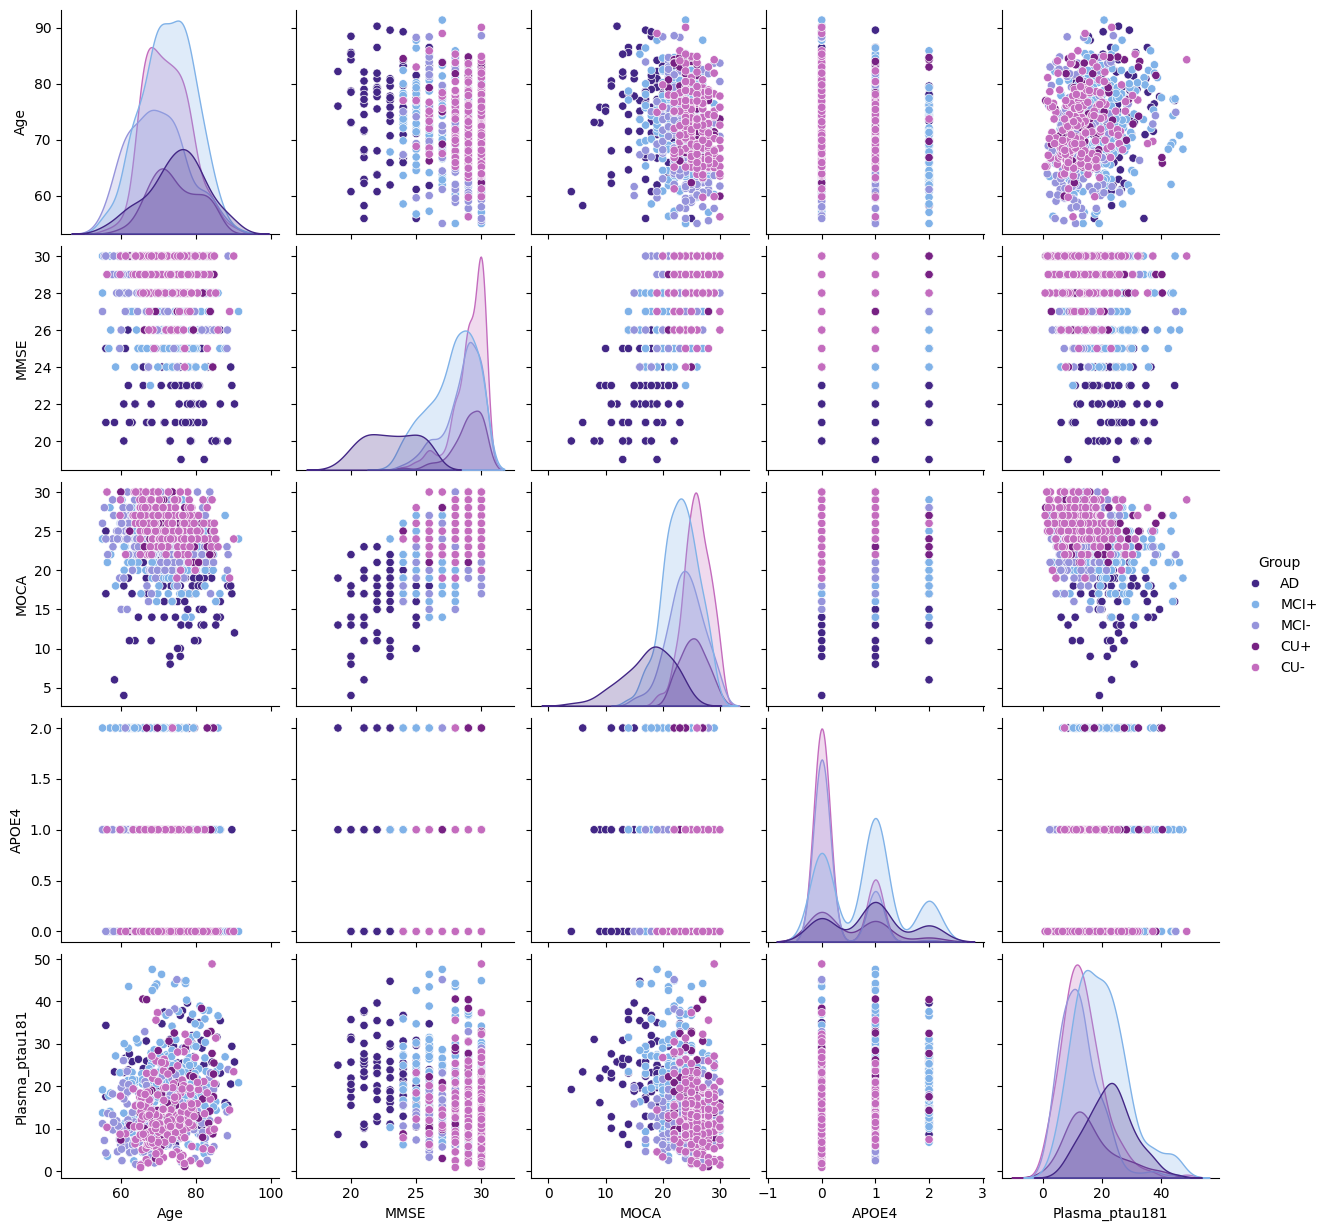

In [53]:
palette_grad = ['#432786', '#80b2e8', '#9694DB', '#772183', '#C46CBE']
sns.pairplot(adni_full, hue = 'Group', palette = palette_grad);

/Users/maria/Library/Mobile Documents/com~apple~CloudDocs/Documents/THE BRIDGE/Data Science/Ejercicios/Project_EDA/src/utils/viz_tools.py:405: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.kdeplot(df, x = col, hue = target, ax = ax, fill = True, palette = adjust_palette(palette, df[col].nunique()))


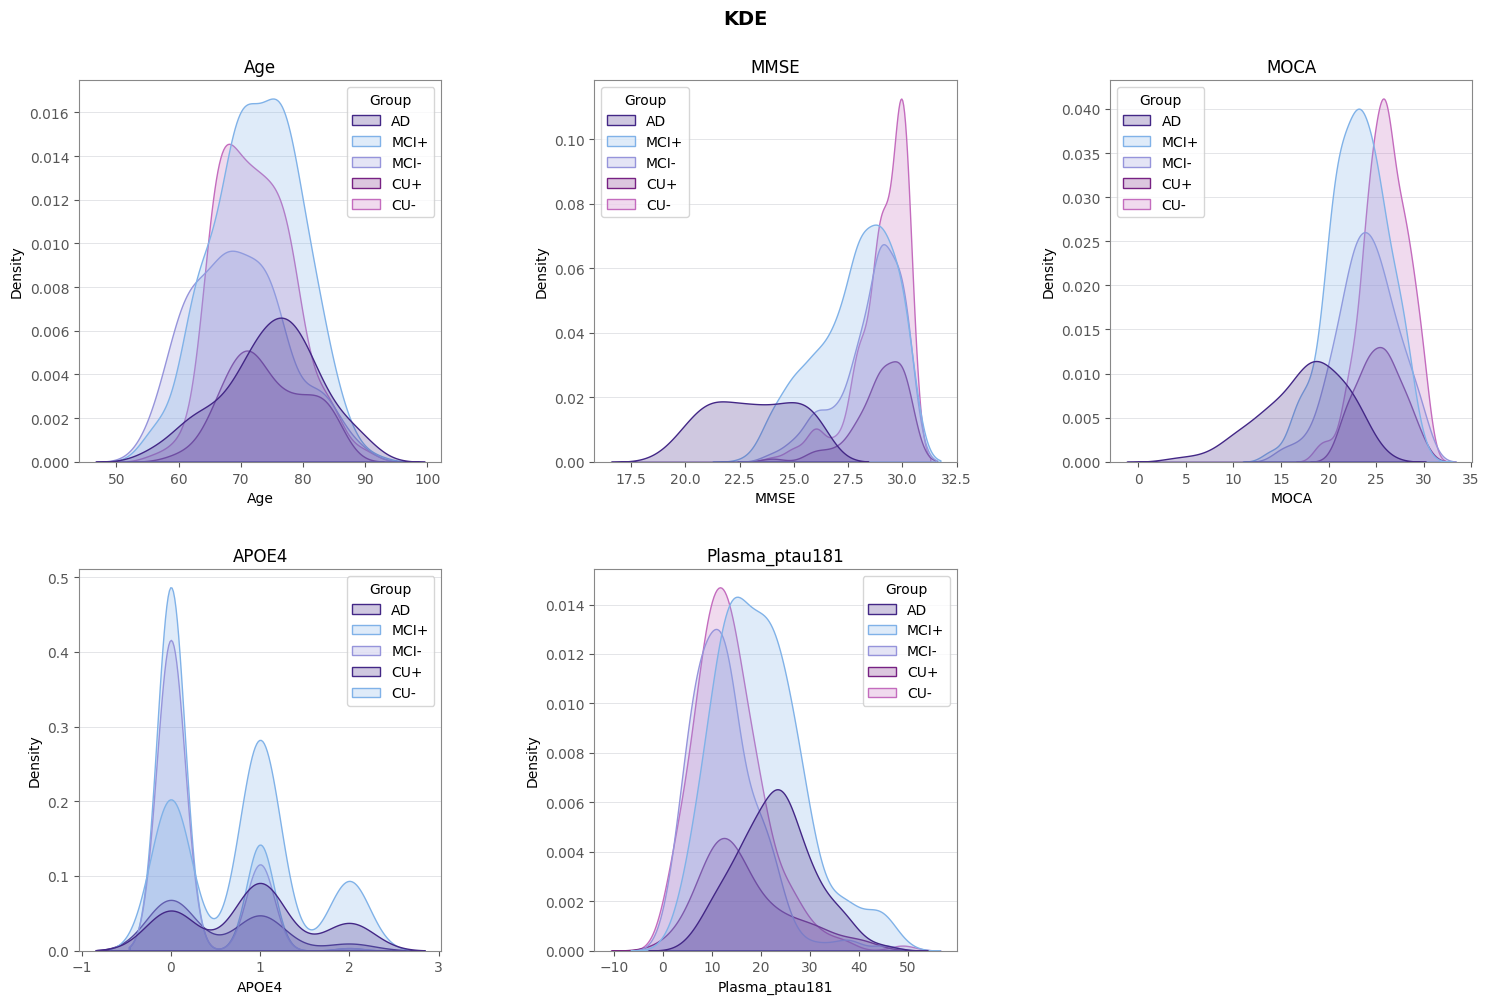

In [54]:
copy = adni_full.copy()
temp = copy.drop('DX', axis = 1)
vt.plot_kde(temp, 'Group', palette = palette_grad)

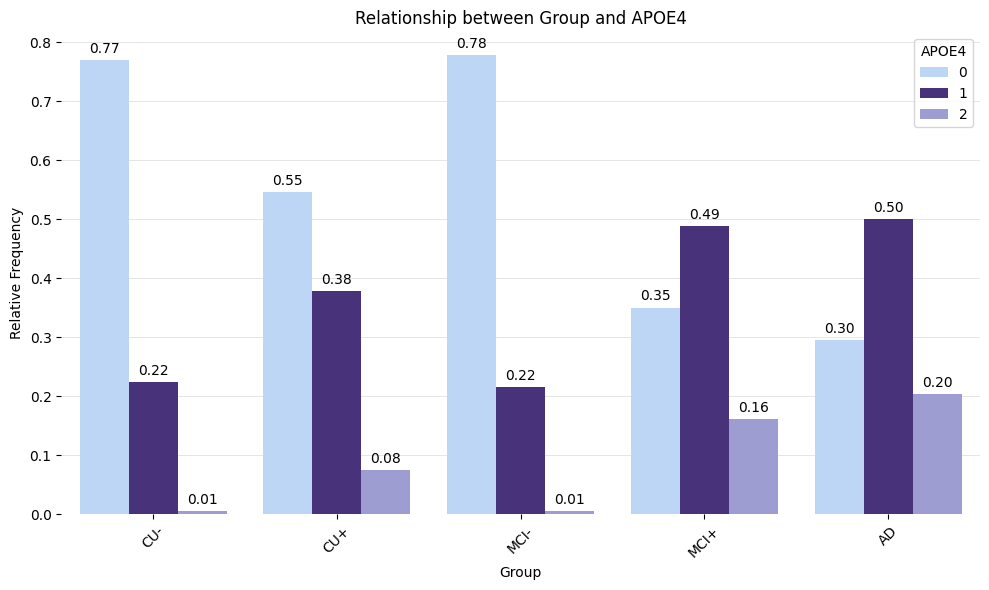

In [30]:
vt.plot_categorical_relationship(adni_full, 'Group', 'APOE4', relative = True, show_values = True, palette = palette_2)